In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas as pd
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns
from collections import defaultdict
from sequencing_tools.viz_tools import okabeito_palette, \
                        simpsons_palette, color_encoder
from collections import defaultdict
import re
import glob
import os
from plotting_utils import label_sample, rename_sample, \
                        label_ce, rna_type_ce, label_order, \
                        figure_path

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [37]:
ce = color_encoder()
insert_path = '/stor/work/Lambowitz/cdw2854/cfNA/tgirt_map/fragment_sizes'
data_files = glob.glob(insert_path + '/*.feather')
df = {os.path.basename(data_file):pd.read_feather(data_file) for data_file in data_files}
df = pd.concat([val.assign(label = key) for key, val in df.items()]) \
        .assign(label = lambda d: d.label.str.replace('.feather','').str.capitalize())\
        .assign(label = lambda d: np.where(d.label == 'Polya','PolyA-selected', d.label)) \
        .assign(bed = lambda d: d.bed.str.split('/', expand=True).iloc[:,-3])\
        .assign(color = lambda d: ce.fit_transform(d.label, simpsons_palette())) \
        .groupby(['bed','label', 'color','isize'], as_index=False)\
        .agg({'size_count':'sum'}) \
        .sort_values('isize')\
        .query('isize<400') \
        .assign(size_fraction = lambda d: d.groupby('bed').size_count.transform(lambda x: x/x.sum()))
df.head()

,bed,label,color,isize,size_count,size_fraction
0,QCF1_R1_001,Unfragmented,#FD7446,15,886,0.000128
4548,Qcf12_R1_001,Unfragmented,#FD7446,15,513,0.000060
82094,Qcf_L1_R1_001,PolyA-selected,#D2AF81,15,2,0.000001
80600,Qcf_HS3_R1_001,High_salt,#46732E,15,196,0.000010
1105,QCF2_R1_001,Unfragmented,#FD7446,15,946,0.000101


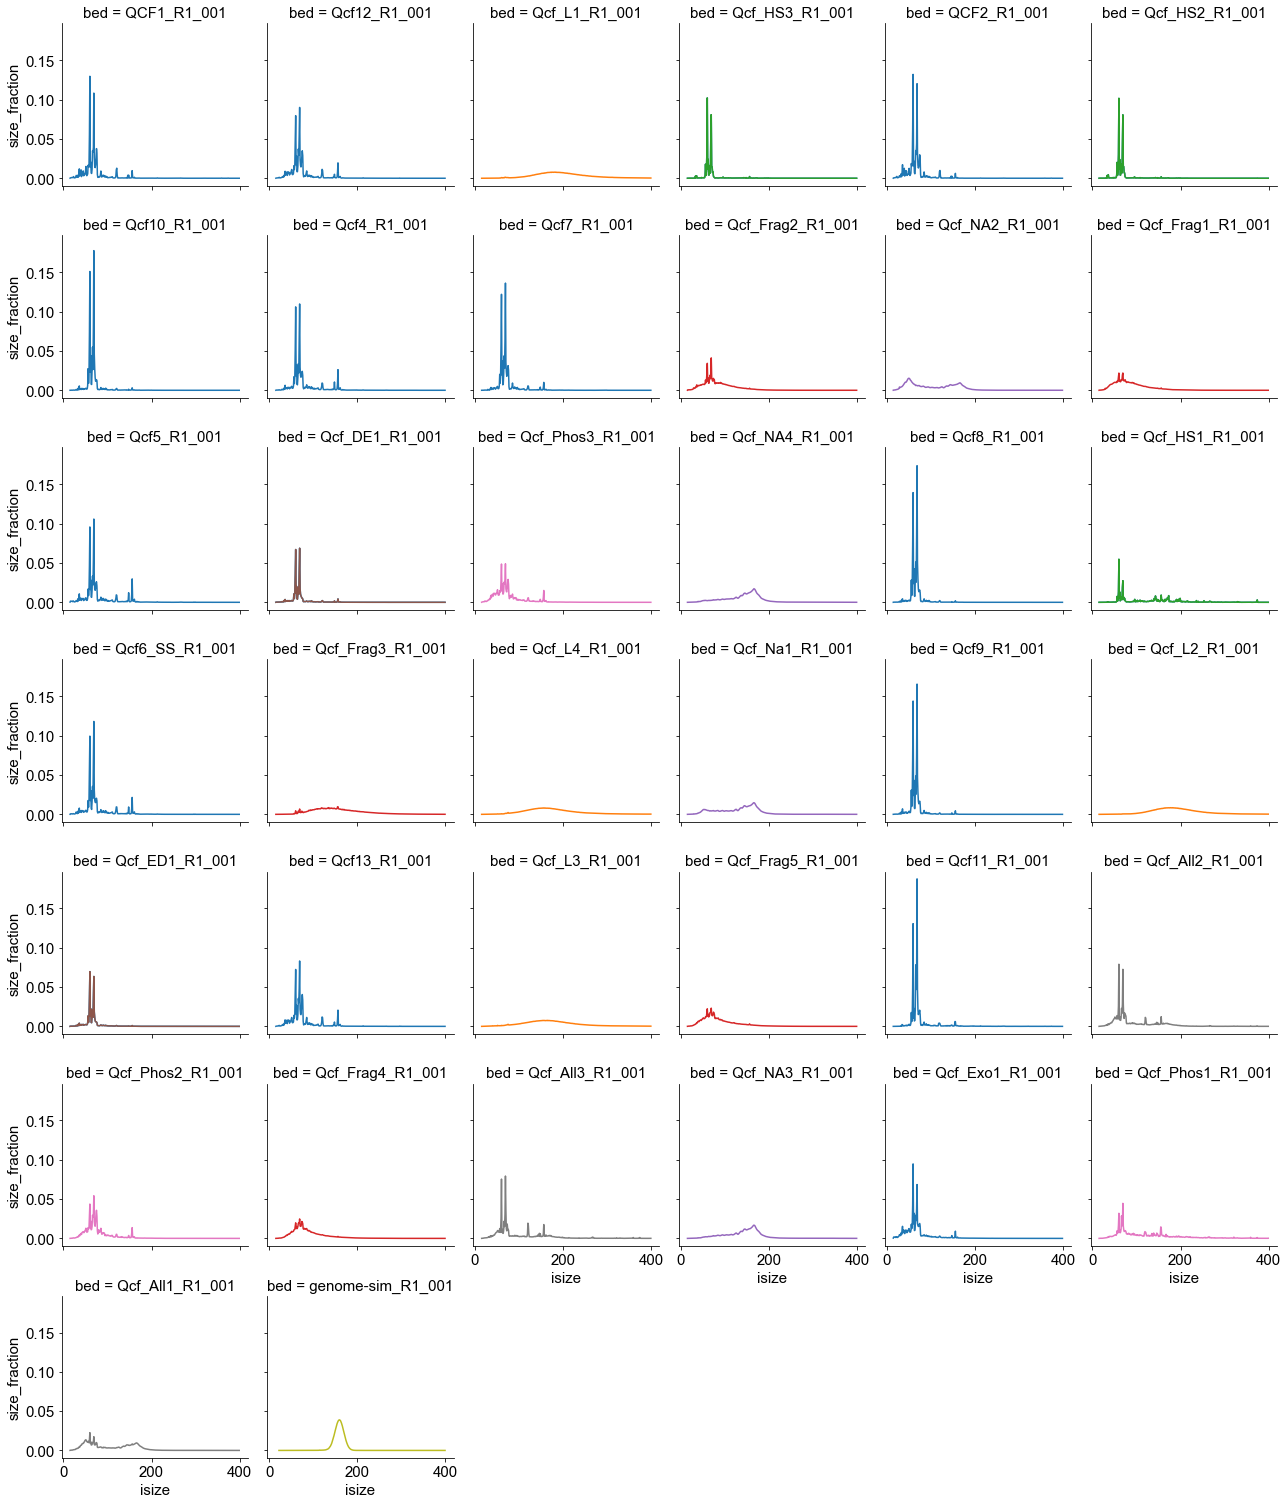

In [38]:
p = sns.FacetGrid(data = df, hue = 'label', col_wrap=6, col = 'bed')
p.map(plt.plot,'isize', 'size_fraction')